
&nbsp;

# 04 - Diagnostiquer la stationnarité des anomalies

&nbsp;

> ### Les anomalies peuvent-elles être considérées comme stationnaires (ou quasi-stationnaire) pour l’analyse statistique et le SciML ?

Une hypothèse clé en statistique, notamment si on veut entraîner un modèle ML, est la suppositon implicite que les données sont stationnaires (au moins faiblement). Il est donc indispensable de vérifier de la véracité de l'hypothèse de stationnarité pour pouvoir discuter de la raisonnabilité des hypothèses du 
modèles (les prédictions).


C'est d'autant plus crucial avant l'entraînement d'un modèle SciML. 

Pourquoi ? Car l'entraînement du modèle sur un jeu de donnée non-stationnaire provoquerait une confusion entre tendance et dynamique au cours du processus de capture de la dynamique. 

À l'inverse, entraîner son modèle sur un jeu de donnée présumé stationnaire (ou quasi-stationnaire) permet notamment de s’assurer de la stabilité des moments statistiques du signal et de limiter l’apprentissage de structures non physiques liées à des dérives temporelles.

> Les anomalies considérées ici sont celles définies et validées dans le notebook 03.

&nbsp;

## 1. Moyenne spatiale de la SST et comparaison par sous-périodes temporelles

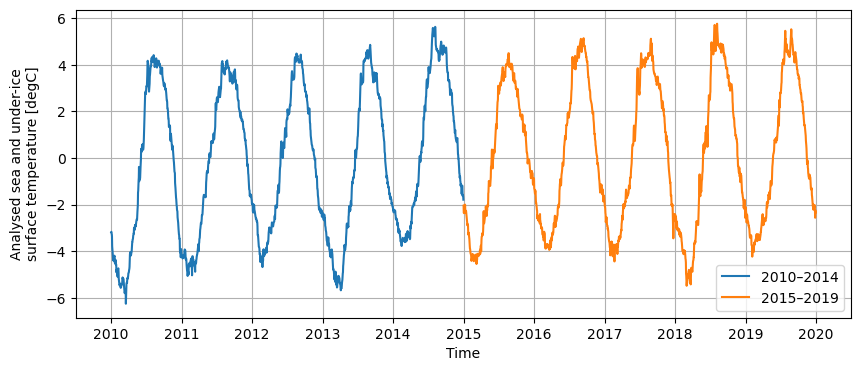

In [1]:
import xarray as xr
import matplotlib.pyplot as plt

# Load the processed SST dataset

ds = xr.open_dataset("data/processed/sstCOPERNICUS20102019Processed.nc", chunks={"time":365}, decode_times=True)

# We compute again the SST anomalies for the English Channel region

sst = ds['analysed_sst']

sstMean = sst.mean(dim='time')

sstAnom = sst - sstMean

sstEarly = sstAnom.sel(time=slice("2010", "2014")).mean(dim=["latitude","longitude"])
sstLate  = sstAnom.sel(time=slice("2015", "2019")).mean(dim=["latitude","longitude"])

plt.figure(figsize=(10,4))
sstEarly.plot(label="2010–2014")
sstLate.plot(label="2015–2019")
plt.legend()
plt.grid(True)

## 2. Visualisation de la variance glissante

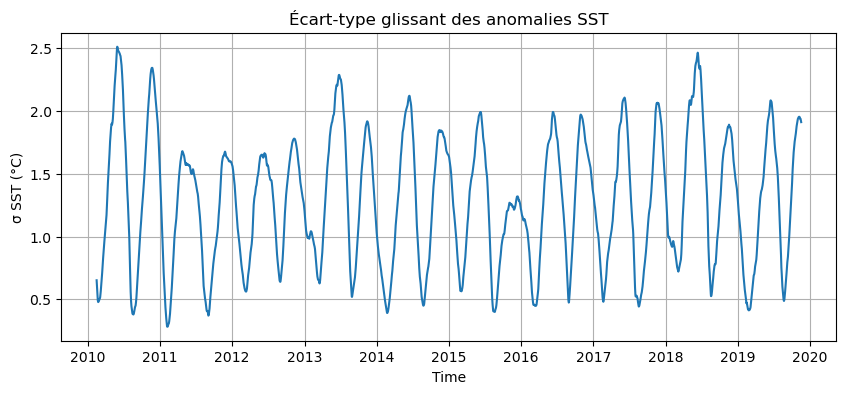

In [3]:
rollingStd = sstMeanTs.rolling(time=90, center=True).std()

rollingStd.plot(figsize=(10,4))
plt.title("Écart-type glissant des anomalies SST")
plt.ylabel("σ SST (°C)")
plt.grid(True)


## 4. Histogramme des anomalies

Text(0.5, 0, 'Anomalie SST (°C)')

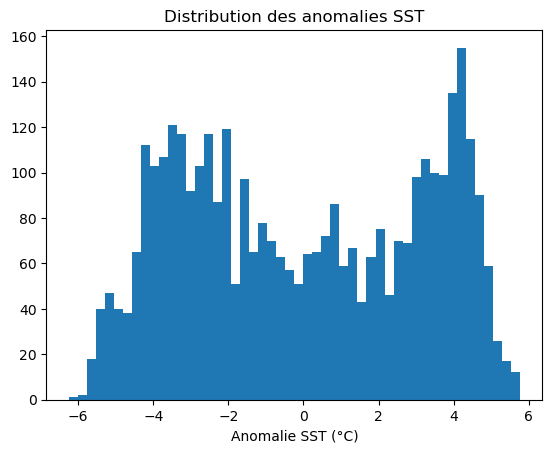

In [4]:
sstMeanTs.plot.hist(bins=50)
plt.title("Distribution des anomalies SST")
plt.xlabel("Anomalie SST (°C)")
